In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb
import math

plt.rcParams["font.size"] = 16
plt.rcParams["axes.axisbelow"] = True

## 離散確率分布

### 離散一様分布

#### 概要
- $x=1,2,...,N$ となる確率が等しい.

#### 質量関数
$
\begin{align}
p(x|N) = \frac{1}{N},\quad(x=1,2,...,N)
\end{align}
$


#### 期待値
$
\begin{align}
\mathrm{E}[x] &= \sum_{x=1}^N x\frac{1}{N} \\
&= \frac{1}{N}\frac{N(N+1)}{2} \\
&= \frac{N+1}{2}
\end{align}
$

#### 分散
$
\begin{align}
\mathrm{E}[x^2] &= \sum_{x=1}^N x^2\frac{1}{N} \\
&= \frac{1}{N}\frac{N(N+1)(2N+1)}{6} \\
&= \frac{(N+1)(2N+1)}{6}
\end{align}
$

$
\begin{align}
\mathrm{Var}[x] &= \mathrm{E}[x^2] - \mathrm{E}[x]^2 \\
&= \frac{(N+1)(2N+1)}{6} - \left(\frac{N+1}{2}\right)^2 \\
&= \frac{(N+1)(N-1)}{12}
\end{align}
$

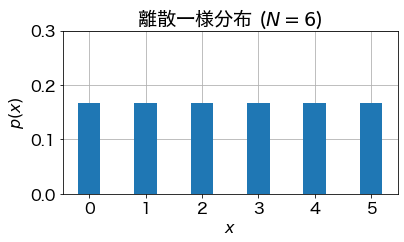

In [2]:
def descrete_uniform(N):
    return 1/N

N = 6
x = np.array([i for i in range(N)])
p_x = descrete_uniform(N)

plt.figure(figsize=(6, 3))
plt.bar(x.astype(str), p_x, width=0.4)
plt.title("離散一様分布 ($N=6$)")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.ylim(0, 0.3)
plt.grid()
plt.show()

### 二項分布

#### 概要
- 成功確率 $\mu$ のベルヌーイ試行を独立に $N$ 回行った時の, **成功回数**の分布.

#### 質量関数
$
\begin{align}
p(x|N,\mu) = \binom{N}{x}\mu^x(1-\mu)^{N-x},\quad(x=0,1,2,...,N)
\end{align}
$

#### 期待値
$
\begin{align}
\mathrm{E}[x] = N\mu
\end{align}
$

#### 分散
$
\begin{align}
\mathrm{Var}[x] = N\mu(1-\mu)
\end{align}
$

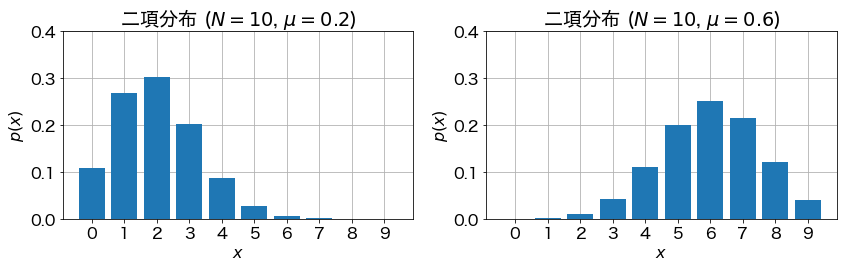

In [3]:
def binomial(x, N, mu):
    return np.array([comb(N, _x, exact=True)*(mu**_x)*(1-mu)**(N-_x) for _x in x])


param_l = [
    [10, 0.2], # N, mu
    [10, 0.6]
]

fig = plt.figure(figsize=(12, 4))
for i, (N, mu) in enumerate(param_l, 1):
    x = np.array([i for i in range(N)])
    p_x = binomial(x, N, mu)

    ax = plt.subplot(1, 2, i)
    ax.bar(x.astype(str), p_x, width=0.8)
    ax.set_title(f"二項分布 ($N={N}$, $\mu={mu}$)")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.set_ylim(0, 0.4)
    ax.grid()

plt.tight_layout()
plt.show()

### ポアソン分布

#### 概要
- **稀な現象**が起こる回数の分布.
- 二項分布において, $n\to\infty, p\to0$
- 平均と分散が等しい.

#### 質量関数
$
\begin{align}
p(x|\lambda) = \frac{\lambda^k}{k!} e^{-\lambda}, \quad(x=0,1,2,...)
\end{align}
$

#### 期待値
$
\begin{align}
\mathrm{E}[x] =
\end{align}
$

#### 分散
$
\begin{align}
\mathrm{Var}[x] =
\end{align}
$

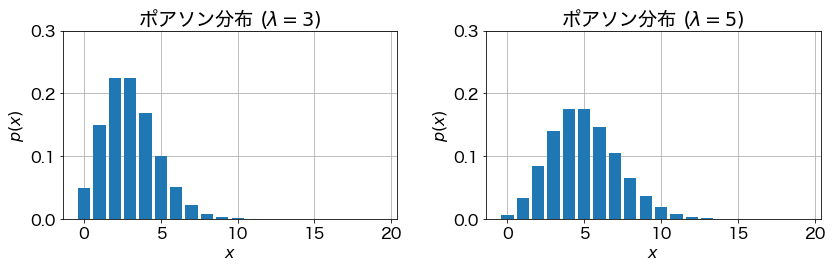

In [4]:
def poisson(x, lam):
    return (lam**x/np.vectorize(math.factorial)(x))*np.e**(-lam)

param_l = [3, 5]

fig = plt.figure(figsize=(12, 4))
for i, lam in enumerate(param_l, 1):
    x = np.array([i for i in range(20)])
    p_x = poisson(x, lam)

    ax = plt.subplot(1, 2, i)
    ax.bar(x, p_x, width=0.8)
    ax.set_title(f"ポアソン分布 ($\lambda={lam})$")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.set_ylim(0, 0.3)
    ax.grid()

plt.tight_layout()
plt.show()

### 幾何分布

#### 概要
- 成功確率 $\mu$ のベルヌーイ試行を独立に $N$ 回行った時の, **初めて成功するまでに要した失敗回数**の分布.

#### 質量関数
$
\begin{align}
p(x|\mu) = p(1-p)^k,\quad(x=0,1,2,...)
\end{align}
$

#### 期待値
$
\begin{align}
\mathrm{E}[x] =
\end{align}
$

#### 分散
$
\begin{align}
\mathrm{Var}[x] =
\end{align}
$

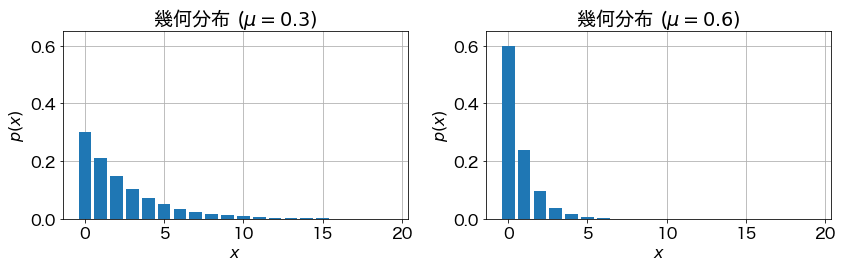

In [5]:
def geometric(x, mu):
    return mu*(1-mu)**x


param_l = [0.3, 0.6]

fig = plt.figure(figsize=(12, 4))
for i, mu in enumerate(param_l, 1):
    x = np.array([i for i in range(20)])
    p_x = geometric(x, mu)

    ax = plt.subplot(1, 2, i)
    ax.bar(x, p_x, width=0.8)
    ax.set_title(f"幾何分布 ($\mu={mu})$")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.set_ylim(0, 0.65)
    ax.grid()

plt.tight_layout()
plt.show()